
# 项目：探索电影的影片类型、导演、预算和收益的相关问题

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 本项目用于研究探索电影的不同因素之间的关系，数据来源于TMDb电影数据集。首先，通过查看该数据集的csv文件，发现该数据集所包含的信息很多，共有21种，分别是: id\imdb_i\popularity\budget\revenue\original_title\cast\homepage\director\tagline\keywords\overview\runtime\genres\production_companies\release_data\vote_count\vote_average\release_year\budget_adj\revenue_adj。
>  根据这些信息我们将提出以下问题以供进一步探索：

>  1.不同的影片类型随着时间的发展，变化趋势是怎样的？

>  2.哪位导演所出的作品的综合评分较高？

>  3.电影预算的大小是否会对收益的大小有影响？



In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## 数据整理

> 首先，预览一下数据，查看数据属性，接着选择整理的方法。

### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### 数据清理---删除无关列、丢弃空白行

In [3]:
#根据探索问题的需要，删除不相关列的数据，并检验剩余列。
df.drop(['imdb_id','homepage', 'budget','production_companies', 'revenue', 'cast', 'tagline', 'keywords', 'overview', 'runtime', 'release_date',], axis = 1, inplace = True)
df.head()


,id,popularity,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#查看缺失值数量
df.isnull().sum()

id                 0
popularity         0
original_title     0
director          44
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [5]:
#丢弃缺失行
df.dropna(axis=0, inplace = True)

In [6]:
#检查任何列是否有空值
df.isnull().sum().any()

False

数据清理工作已经完毕，等待进一步的数据分析。

<a id='eda'></a>
## 探索性数据分析


### 研究问题 1.不同的影片类型随着时间的发展，变化趋势是怎样的？

In [7]:
# 单独生成一个新数据集gen
col = ['id', 'release_year', 'genres']
gen = pd.DataFrame(df, columns = col)
gen.head()

,id,release_year,genres
0,135397,2015,Action|Adventure|Science Fiction|Thriller
1,76341,2015,Action|Adventure|Science Fiction|Thriller
2,262500,2015,Adventure|Science Fiction|Thriller
3,140607,2015,Action|Adventure|Science Fiction|Fantasy
4,168259,2015,Action|Crime|Thriller


In [8]:
#把genres列的每行的电影类别拆解成多行。
genr = gen.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
#查看拆分后的数据集
genr.head(10)

,id,release_year,genres
0,135397,2015,Action
0,135397,2015,Adventure
0,135397,2015,Science Fiction
0,135397,2015,Thriller
1,76341,2015,Action
1,76341,2015,Adventure
1,76341,2015,Science Fiction
1,76341,2015,Thriller
2,262500,2015,Adventure
2,262500,2015,Science Fiction


In [9]:
#按照release_yea、genres两列进行groupby分组
year = genr.groupby(['release_year', 'genres'], as_index = False).count()

In [10]:
#查看分组结果
year.head()

,release_year,genres,id
0,1960,Action,8
1,1960,Adventure,5
2,1960,Comedy,8
3,1960,Crime,2
4,1960,Drama,13


In [11]:
#重命名year数据集中['id']为['count']
year = year.rename(columns = {'id': 'count'})

In [12]:
year.head()

,release_year,genres,count
0,1960,Action,8
1,1960,Adventure,5
2,1960,Comedy,8
3,1960,Crime,2
4,1960,Drama,13


In [13]:
#将“长格式”转换成“宽格式”
unstacked = year.set_index(['release_year', 'genres']).unstack('genres')
unstacked.head(10)

count                                                            \
genres       Action Adventure Animation Comedy Crime Documentary Drama Family   
release_year                                                                    
1960            8.0       5.0       NaN    8.0   2.0         NaN  13.0    3.0   
1961            7.0       6.0       1.0   10.0   2.0         NaN  16.0    5.0   
1962            8.0       7.0       NaN    5.0   3.0         NaN  21.0    2.0   
1963            4.0       7.0       1.0   13.0   4.0         NaN  13.0    3.0   
1964            5.0       5.0       2.0   16.0  10.0         NaN  20.0    4.0   
1965            9.0       6.0       1.0    7.0   2.0         NaN  20.0    3.0   
1966           14.0      11.0       3.0   16.0   5.0         1.0  16.0    7.0   
1967            7.0       7.0       2.0   17.0   7.0         1.0  16.0    3.0   
1968            6.0       5.0       3.0    9.0   5.0         NaN  20.0    5.0   
1969           10.0       5.0       3.0   12.0   3.0         NaN  13.0    4.0   

                                                                   \
genres       Fantasy Foreign History Horror Music Mystery Romance   
release_year                                                        
1960             2.0     1.0     5.0    7.0   1.0     NaN     6.0   
1961             2.0     1.0     3.0    3.0   2.0     1.0     7.0   
1962             1.0     1.0     4.0    5.0   1.0     4.0     5.0   
1963             2.0     2.0     4.0    9.0   NaN     6.0     8.0   
1964             4.0     1.0     3.0    6.0   5.0     4.0     9.0   
1965             NaN     1.0     4.0    5.0   2.0     3.0     5.0   
1966             2.0     2.0     2.0    3.0   NaN     6.0     6.0   
1967             3.0     NaN     NaN    4.0   4.0     3.0    11.0   
1968             5.0     NaN     3.0    4.0   3.0     4.0     6.0   
1969             2.0     NaN     3.0    1.0   2.0     1.0     4.0   

                                                             
genres       Science Fiction TV Movie Thriller  War Western  
release_year                                                 
1960                     3.0      NaN      6.0  2.0     6.0  
1961                     4.0      NaN      NaN  2.0     3.0  
1962                     2.0      NaN      7.0  3.0     3.0  
1963                     2.0      NaN     10.0  1.0     2.0  
1964                     4.0      NaN      9.0  3.0     1.0  
1965                     2.0      1.0     11.0  8.0     4.0  
1966                     6.0      NaN      8.0  4.0     7.0  
1967                     4.0      NaN      5.0  1.0     2.0  
1968                     4.0      NaN      5.0  4.0     1.0  
1969                     3.0      1.0      3.0  3.0     7.0

In [14]:
#去掉多层级列标签中的count
unstacked.columns = unstacked.columns.droplevel()

In [15]:
unstacked.tail(10)

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
2006,80.0,55.0,39.0,155.0,53.0,16.0,197.0,65.0,34.0,10.0,12.0,56.0,12.0,30.0,70.0,30.0,8.0,114.0,7.0,1.0
2007,94.0,60.0,31.0,151.0,65.0,19.0,197.0,45.0,47.0,16.0,13.0,78.0,15.0,33.0,74.0,38.0,5.0,123.0,6.0,5.0
2008,98.0,63.0,33.0,166.0,62.0,25.0,232.0,55.0,43.0,17.0,24.0,76.0,18.0,29.0,83.0,52.0,5.0,127.0,18.0,2.0
2009,108.0,71.0,48.0,198.0,52.0,25.0,222.0,58.0,49.0,16.0,16.0,90.0,17.0,51.0,83.0,70.0,8.0,157.0,12.0,NaN
2010,107.0,58.0,47.0,168.0,50.0,34.0,209.0,54.0,42.0,13.0,14.0,78.0,8.0,32.0,84.0,46.0,7.0,134.0,7.0,6.0
2011,115.0,62.0,46.0,172.0,48.0,48.0,214.0,72.0,46.0,14.0,8.0,78.0,17.0,38.0,75.0,56.0,10.0,146.0,9.0,3.0
2012,99.0,50.0,39.0,175.0,54.0,48.0,232.0,41.0,34.0,6.0,12.0,104.0,22.0,33.0,79.0,54.0,14.0,160.0,10.0,4.0
2013,119.0,65.0,42.0,173.0,71.0,61.0,253.0,47.0,38.0,NaN,14.0,102.0,30.0,38.0,65.0,60.0,9.0,175.0,7.0,3.0
2014,129.0,67.0,36.0,184.0,65.0,69.0,284.0,43.0,36.0,NaN,15.0,105.0,27.0,36.0,83.0,62.0,12.0,179.0,23.0,6.0


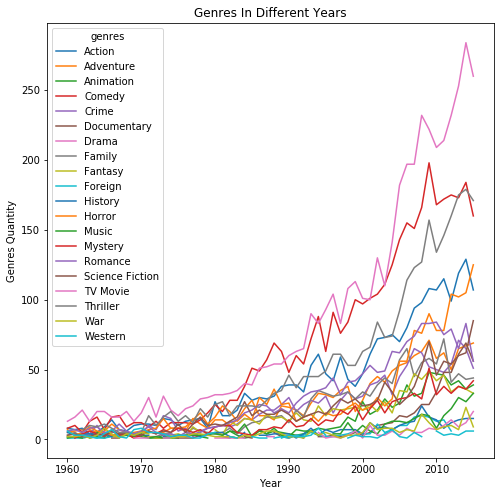

In [16]:
#画折线图
unstacked.plot(figsize=(8,8))
plt.title('Genres In Different Years')
plt.xlabel('Year')
plt.ylabel('Genres Quantity');

**结论1：**从折线图反映，Drama、Comedy、Thriller、Action、Horror等几个类型的电影的产量在近50年间增长非常迅速，市场前景较好；而Western、War、TV Movie、History等类型的电影在近50年来，几乎没有增长，说明这类电影的市场需求不乐观。

### 研究问题 2 .哪位导演所出的作品的综合评分较高？

In [17]:
#提取相关列生成新数据集
col = ['id','director', 'vote_average']
dir = pd.DataFrame(df, columns = col)
dir.head(10)

,id,director,vote_average
0,135397,Colin Trevorrow,6.5
1,76341,George Miller,7.1
2,262500,Robert Schwentke,6.3
3,140607,J.J. Abrams,7.5
4,168259,James Wan,7.3
5,281957,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,7.2
6,87101,Alan Taylor,5.8
7,286217,Ridley Scott,7.6
8,211672,Kyle Balda|Pierre Coffin,6.5
9,150540,Pete Docter,8.0


In [18]:
# 把director列的导演名单切割成单个人一行
dir = dir.drop('director', axis=1).join(df['director'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('director'))

In [19]:
dir.head()

,id,vote_average,director
0,135397,6.5,Colin Trevorrow
1,76341,7.1,George Miller
2,262500,6.3,Robert Schwentke
3,140607,7.5,J.J. Abrams
4,168259,7.3,James Wan


In [20]:
#对导演进行分组，取其所有作品评分的平均值，降序排序。
dir.groupby('director').vote_average.mean().sort_values(ascending=False)

director
Mark Cousins              9.200000
Derek Frankowski          8.800000
David Mallet              8.700000
Michael Henry Wilson      8.500000
Curt Morgan               8.500000
Saul Swimmer              8.500000
Jorge RamÃ­rez SuÃ¡rez    8.400000
David Dawkins             8.400000
Chris Hegedus             8.400000
Anthony Mandler           8.400000
Jennifer Siebel Newsom    8.350000
Jeff Feuerzeig            8.300000
Dean Wellins              8.300000
Claude Lanzmann           8.300000
Andy Saunders             8.300000
Scot McFadyen             8.233333
Evgeny Afineevsky         8.200000
Al Reinert                8.200000
Damien Chazelle           8.200000
Ã‡aÄŸan Irmak             8.200000
Christopher Kezelos       8.100000
Richard Press             8.100000
Frank Pavich              8.100000
Chris Bould               8.100000
Steven Smith              8.000000
Lauren Lazin              8.000000
Patrick Osborne           8.000000
Douglas Mackinnon         8.000000
BÃ©la Terno

In [21]:
#样本中每个导演的作品数量统计
dir.groupby('director').count()

,id,vote_average
director,,
FrÃ©dÃ©ric Jardin,1,1
A. Todd Smith,1,1
A.R. Murugadoss,1,1
Aaron Aites,1,1
Aaron Blaise,1,1
Aaron Hann,1,1
Aaron Harvey,1,1
Aaron Katz,1,1
Aaron Keeling,1,1


**结论2：**根据以上排序结果显示，电影作品综合评分最高的导演有：
Mark Cousins 、Derek Frankowski、David Mallet、James Payne、Saul Swimmer、Curt Morgan 、Michael Henry Wilson、David Dawkins、Chris Hegedus 、Anthony Mandler、Jorge RamÃrez SuÃ¡rez 等。评分高低是导演实力高低的指向标，但是，由于本样本数量的限制，此样本中很多导演的电影作品只有一部，不能准确反映一个导演所有作品的综合实力，故而此排名并不能产生较好的参考价值。

### 研究问题3.电影预算的大小是否会对收益的大小有影响？

In [22]:
#提取相关列生成新数据集
col = ['release_year','budget_adj', 'revenue_adj']
br = pd.DataFrame(df, columns = col)
br.head(10)

,release_year,budget_adj,revenue_adj
0,2015,1.379999e+08,1.392446e+09
1,2015,1.379999e+08,3.481613e+08
2,2015,1.012000e+08,2.716190e+08
3,2015,1.839999e+08,1.902723e+09
4,2015,1.747999e+08,1.385749e+09
5,2015,1.241999e+08,4.903142e+08
6,2015,1.425999e+08,4.053551e+08
7,2015,9.935996e+07,5.477497e+08
8,2015,6.807997e+07,1.064192e+09
9,2015,1.609999e+08,7.854116e+08


In [23]:
#按照年份分组，并取平均值
means = br.groupby(['release_year'],as_index=False).mean()
means

,release_year,budget_adj,revenue_adj
0,1960,5.082036e+06,3.340991e+07
1,1961,1.085687e+07,7.947167e+07
2,1962,1.232693e+07,4.856238e+07
3,1963,1.535687e+07,3.924580e+07
4,1964,6.608980e+06,5.707603e+07
5,1965,1.388168e+07,9.057670e+07
6,1966,8.405522e+06,1.237527e+07
7,1967,1.687025e+07,1.236680e+08
8,1968,1.156367e+07,4.255388e+07
9,1969,8.078272e+06,4.677888e+07


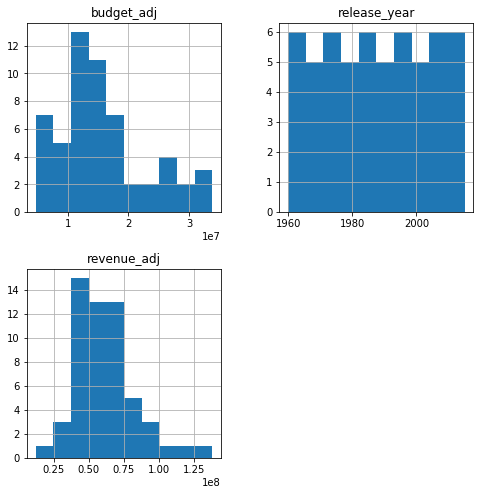

In [24]:
#年平均值的直方图
means.hist(figsize=(8,8));

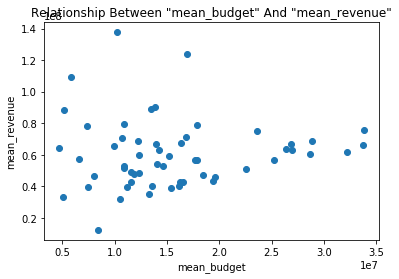

In [25]:
#画预算、收益年平均值的散点图
plt.scatter(means['budget_adj'], means['revenue_adj'])
plt.title('Relationship Between "mean_budget" And "mean_revenue"')
plt.xlabel('mean_budget')
plt.ylabel('mean_revenue');

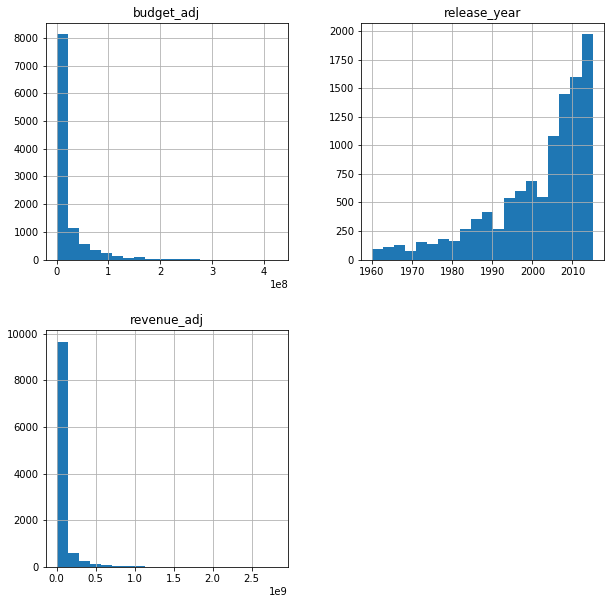

In [26]:
#所有电影预算、收益、上映年份的直方图分布
br.hist(bins=20, figsize=(10,10));

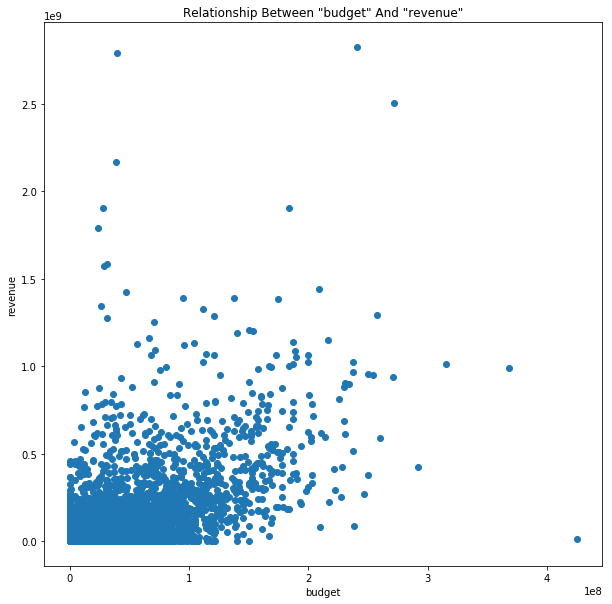

In [27]:
#画预算和收益的所有数值的散点图
plt.subplots(figsize=(10,10))
plt.scatter(br['budget_adj'], br['revenue_adj'])
plt.title('Relationship Between "budget" And "revenue"')
plt.xlabel('budget')
plt.ylabel('revenue');

**结论3：**
（1）从年平均值的直方图和散点图来看，由于得到的年均化的budget和revenue,这样处理会导致样本数减少，所以从预算、收益的年平均值的直方图、散点图不能发现预算和收益有明显的关联。
（2）从所有样本值的直方图、散点图观察结果来看，绝大数预算都在0.2\*1e8以内,绝大数收益在0.1\*1e9以内；每年的样本数并不是平均分布，而是呈现出年年递增的趋势；从所有样本值的散点图来看，同样未发现显著的关联性。
从图像来看，预算和收益之间没有很强的关联性，可以推出，收益的大小不仅仅是由预算这一单方面因素决定的，而是由很多方因素共同影响的，比如：电影类型、演员阵容、导演、故事题材、电影公司等等。

<a id='conclusions'></a>
## 结论

通过数据分析对以上三个问题的探索，可以归纳得出以下结论：

**结论1：**从折线图反映，Drama、Comedy、Thriller、Action、Horror等几个类型的电影的产量在近50年间增长非常迅速，市场前景较好；而Western、War、TV Movie、History等类型的电影在近50年来，几乎没有增长，说明这类电影的市场需求不乐观。

**结论2：**根据以上排序结果显示，电影作品综合评分最高的导演有：
Mark Cousins 、Derek Frankowski、David Mallet、James Payne、Saul Swimmer、Curt Morgan 、Michael Henry Wilson、David Dawkins、Chris Hegedus 、Anthony Mandler、Jorge RamÃrez SuÃ¡rez 等。评分高低是导演实力高低的指向标，但是，由于本样本数量的限制，此样本中很多导演的电影作品只有一部，不能准确反映一个导演所有作品的综合实力，故而此排名并不能产生较好的参考价值。

**结论3：**
（1）从年平均值的直方图和散点图来看，由于得到的年均化的budget和revenue,这样处理会导致样本数减少，所以从预算、收益的年平均值的直方图、散点图不能发现预算和收益有明显的关联。
（2）从所有样本值的直方图、散点图观察结果来看，绝大数预算都在0.2、*1e8以内,绝大数收益在0.1、*1e9以内；每年的样本数并不是平均分布，而是呈现出年年递增的趋势；从所有样本值的散点图来看，同样未发现显著的关联性。
从图像来看，预算和收益之间没有很强的关联性，可以推出，收益的大小不仅仅是由预算这一单方面因素决定的，而是由很多方因素共同影响的，比如：电影类型、演员阵容、导演、故事题材、电影公司等等。